In [2]:
from deep_frecker import DeepFrecker, FreckerDataSet
from torch.utils.data import DataLoader, random_split
import torch
import torch.optim as optim
import torch.nn.functional as F
from fnet import MaskLoss, Conv3DStack


In [3]:

# HDF5Êñá‰ª∂Ë∑ØÂæÑÂíåÊï∞ÊçÆÈõÜÂêçÁß∞
file_path = r"C:\Users\lucyc\Desktop\freckers_data\batch_3_no_inverse.h5"

# ÂàõÂª∫H5DatasetÂØπË±°
dataset = FreckerDataSet(file_path)

# ÂÆö‰πâËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜÁöÑÂ§ßÂ∞è
train_size = int(0.8 * len(dataset))  # 80% Áî®‰∫éËÆ≠ÁªÉ
val_size = len(dataset) - train_size  # 20% Áî®‰∫éÈ™åËØÅ

# ‰ΩøÁî® random_split ÂàÜÂâ≤Êï∞ÊçÆÈõÜ
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

batch_size = 64
shuffle = True
num_workers = 2

# ÂàõÂª∫ DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers, persistent_workers=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, persistent_workers=True)


In [11]:
model = Conv3DStack()

In [12]:
num_epochs = 15
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.0001)
mask_loss = MaskLoss()

train_loss_record = []
eval_loss_record = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for gameboard, action_prob, value in train_loader:
        gameboard = gameboard.to(device)
        action_prob = action_prob.to(device)
        value = value.to(device)

        optimizer.zero_grad()
        p_action_prob, p_value = model(gameboard)
        # ËÆ°ÁÆóÂèåÊçüÂ§±
        loss_img = mask_loss(p_action_prob, action_prob)
        loss_prob = F.mse_loss(p_value.view(-1), value)
        total_loss = loss_img + loss_prob
        
        total_loss.backward()
        optimizer.step()
        train_loss += total_loss.item()
    
    train_loss /= len(train_loader)
    train_loss_record.append(train_loss)

    model.eval()
    eval_loss = 0.0
    with torch.no_grad():
        for gameboard, action_prob, value in val_loader:
            gameboard = gameboard.to(device)
            action_prob = action_prob.to(device)
            value = value.to(device)

            p_action_prob, p_value = model(gameboard)
            loss_img = mask_loss(p_action_prob, action_prob)
            loss_prob = F.mse_loss(p_value.view(-1), value)
            total_loss = loss_img + loss_prob
            
            eval_loss += total_loss.item()
    
    eval_loss /= len(val_loader)
    eval_loss_record.append(eval_loss)

    print(f"Epoch {epoch+1}, Training Loss: {train_loss:.8f}, Validation Loss: {eval_loss:.8f}")



Epoch 1, Training Loss: 0.16620372, Validation Loss: 0.12674986
Epoch 2, Training Loss: 0.10572691, Validation Loss: 0.08986011
Epoch 3, Training Loss: 0.06562797, Validation Loss: 0.05746432
Epoch 4, Training Loss: 0.04059615, Validation Loss: 0.05044011
Epoch 5, Training Loss: 0.03316056, Validation Loss: 0.03895004
Epoch 6, Training Loss: 0.02502216, Validation Loss: 0.03503733
Epoch 7, Training Loss: 0.02423286, Validation Loss: 0.03690538
Epoch 8, Training Loss: 0.02053750, Validation Loss: 0.02941181
Epoch 9, Training Loss: 0.02122523, Validation Loss: 0.02899101
Epoch 10, Training Loss: 0.01936361, Validation Loss: 0.02413210
Epoch 11, Training Loss: 0.01698138, Validation Loss: 0.03879393
Epoch 12, Training Loss: 0.01767276, Validation Loss: 0.02425376
Epoch 13, Training Loss: 0.01709146, Validation Loss: 0.02749474
Epoch 14, Training Loss: 0.01634344, Validation Loss: 0.02272559
Epoch 15, Training Loss: 0.01334172, Validation Loss: 0.02375502


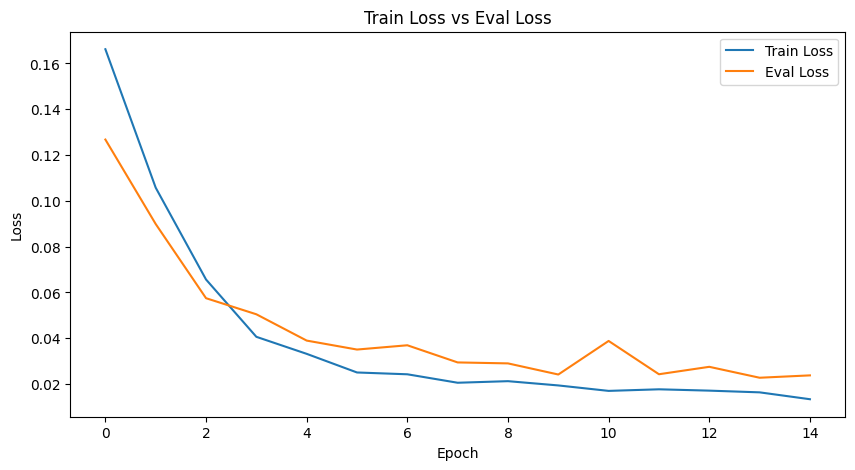

In [13]:
import matplotlib.pyplot as plt

# ÁªòÂà∂ËÆ≠ÁªÉÊçüÂ§±ÂíåÈ™åËØÅÊçüÂ§±ÁöÑÂØπÊØîÂõæ
plt.figure(figsize=(10, 5))
plt.plot(train_loss_record, label='Train Loss')
plt.plot(eval_loss_record, label='Eval Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss vs Eval Loss')
plt.legend()
plt.show()


In [14]:
from mcts import mcts_data_collect

mcts_data_collect(model, 1, f"C:\\Users\\lucyc\\Desktop\\freckers_data\\temp.h5", 30, 500)

Á∫øÁ®ã 1 Á¨¨ 0 ËΩÆÊ∏∏Êàè  Á¨¨ 0 Ê≠• Ê®°ÊãüËøõË°å‰∏≠
add dirichlet noise

Rounds:  1
üü¢üî¥üî¥üî¥üî¥üî¥üî¥üü¢
‚ö™üü¢üü¢üü¢üü¢üü¢üü¢‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™üü¢üîµüü¢üü¢üü¢üü¢‚ö™
üü¢üîµüîµ‚ö™üîµüîµüîµüü¢
move action:  (7, 3, 6, 2, False)
add dirichlet noise
Á∫øÁ®ã 1 Á¨¨ 0 ËΩÆÊ∏∏Êàè  Á¨¨ 1 Ê≠• Ê®°ÊãüËøõË°å‰∏≠

Rounds:  2
üü¢üî¥üî¥üî¥‚ö™üî¥üî¥üü¢
‚ö™üü¢üü¢üü¢üî¥üü¢üü¢‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™üü¢üîµüü¢üü¢üü¢üü¢‚ö™
üü¢üîµüîµ‚ö™üîµüîµüîµüü¢
move action:  (0, 4, 1, 4, False)
add dirichlet noise
Á∫øÁ®ã 1 Á¨¨ 0 ËΩÆÊ∏∏Êàè  Á¨¨ 2 Ê≠• Ê®°ÊãüËøõË°å‰∏≠

Rounds:  3
üü¢üî¥üî¥üî¥‚ö™üî¥üî¥üü¢
‚ö™üü¢üü¢üü¢üî¥üü¢üü¢‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™üü¢üîµüü¢üîµüü¢üü¢‚ö™
üü¢üîµüîµ‚ö™üîµ‚ö™üîµüü¢
mo

c:\Users\lucyc\Desktop\freckers_zero\freckers\mcts.py:180: RuntimeWarning: invalid value encountered in divide
  v_order_rec = v_order_rec / np.sum(v_order_rec)



Rounds:  1
üü¢üî¥üî¥üî¥üî¥üî¥üî¥üü¢
‚ö™üü¢üü¢üü¢üü¢üü¢üü¢‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™üü¢üü¢üü¢üü¢üü¢üü¢‚ö™
üü¢üîµüîµüîµüîµüîµ‚ö™üîµ
move action:  (7, 6, 7, 7, False)
add dirichlet noise
Á∫øÁ®ã 1 Á¨¨ 1 ËΩÆÊ∏∏Êàè  Á¨¨ 1 Ê≠• Ê®°ÊãüËøõË°å‰∏≠

Rounds:  2
üü¢üî¥üî¥üî¥‚ö™üî¥üî¥üü¢
‚ö™üü¢üü¢üü¢üü¢üî¥üü¢‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™üü¢üü¢üü¢üü¢üü¢üü¢‚ö™
üü¢üîµüîµüîµüîµüîµ‚ö™üîµ
move action:  (0, 4, 1, 5, False)
add dirichlet noise
Á∫øÁ®ã 1 Á¨¨ 1 ËΩÆÊ∏∏Êàè  Á¨¨ 2 Ê≠• Ê®°ÊãüËøõË°å‰∏≠

Rounds:  3
üü¢üî¥üî¥üî¥‚ö™üî¥üî¥üü¢
‚ö™üü¢üü¢üü¢üü¢üî¥üü¢‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™‚ö™
‚ö™üü¢üü¢üü¢üü¢üü¢üü¢‚ö™
üîµüîµ‚ö™üîµüîµüîµ‚ö™üîµ
move action:  (7, 2, 7, 0, False)
add dirichlet noise
Á∫øÁ®ã 1 Á¨¨ 1 ËΩÆÊ∏

KeyboardInterrupt: 

In [ ]:
import threading
import time
from mcts import mcts_data_collect

#(model, thread_num, file, rounds=100, sim_step=300)
# ÂàõÂª∫Â§ö‰∏™Á∫øÁ®ã
threads = []
for i in range(8):
    thread = threading.Thread(target=mcts_data_collect, 
            args=(model, i+1, f"C:\\Users\\lucyc\\Desktop\\freckers_data\\batch_1.h5", 30, 500))
    threads.append(thread)
    thread.start()

# Á≠âÂæÖÊâÄÊúâÁ∫øÁ®ãÂÆåÊàê
for thread in threads:
    thread.join()


In [12]:
torch.save(model, "C:\\Users\\lucyc\\Desktop\\freckers_data\\batch_2_no_inverse.pth")